# Dosenbach2007 — Figure 9

This notebook applied hierarchical clustering to the group-average resting connectome of the Julia2018 dataset.

The outcome would be a plot similar to Dosenbach2007/Figure9. Here is how the original figure looks like.

![Figure 9](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1904171/bin/pnas_0704320104_04320Fig9.jpg)

> Fig. 9. Hierarchical cluster tree of all functional connections between putative task control regions. The x axis shows the distance (1-r) used for clustering with an average-linkage algorithm (UPGMA). In this tree, positively correlated clusters are close (distance <1) and negatively correlated clusters are far apart (distance >1). The bootstrap confidence intervals (CIs) are shown in white next to each branch point. The colors show eight clusters generated by cutting the tree at a distance of 0.9, such that all clusters have a CI of >90%.



In [1]:
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

In [3]:
DATA = pd.read_csv('outputs/julia2018_resting_connectome_mean.tsv', index_col=0, sep='\t')

labels = DATA.columns.to_list()

In [4]:
# 1-r
DATA.iloc[:, :] = (1.0 - DATA.values)

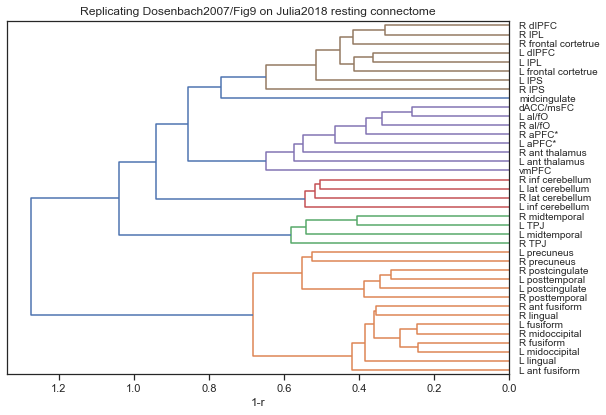

In [5]:
# UPGMA linkage
linkages = linkage(DATA.values, 'average', metric='correlation')

# TODO use timeseries instead of correlation matrix

fix, ax = plt.subplots(1,1,figsize=(9, 6.5))

dendrogram(linkages, orientation='left',
           labels=labels,
           leaf_font_size=10.,
           color_threshold=.7,
           ax=ax)

ax.set(xlabel='1-r', title='Replicating Dosenbach2007/Fig9 on Julia2018 resting connectome')
plt.show()

# TODO measure CI of clusters and choose a cutting threshold such that all clusters have CI > 90%.


Below are some more expriments to improve vizualization:

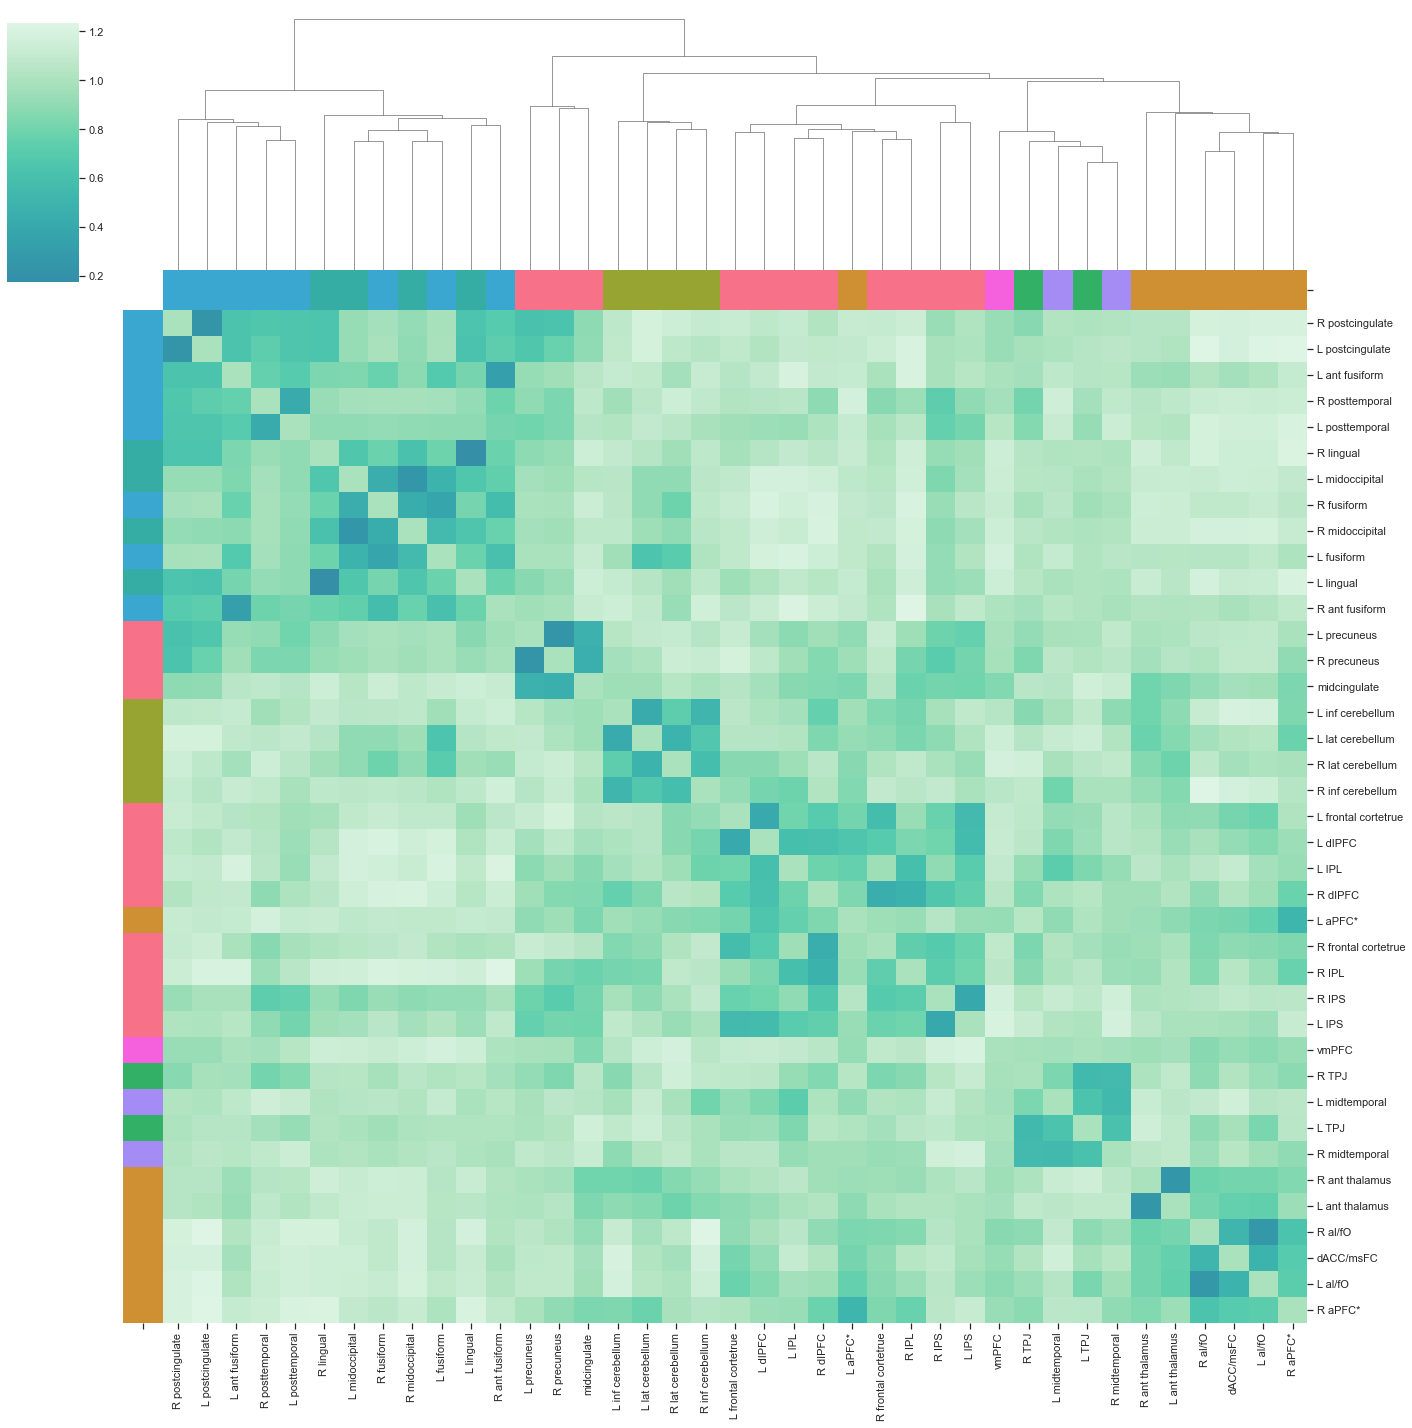

In [6]:
# maps ROI to dosenbach component (same as the 'Comp' column in ROI table)
dosenbach_components = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                        2, 2, 2, 2, 2, 2, 2,
                        3, 3, 3, 3,
                        4, 4,
                        5, 5, 5, 5,
                        6, 6, 6, 6, 6, 6, 6, 6,
                        7, 7,
                        8]

# Create a categorical palette to identify the compoenent (i.e., map node to component_color)
pallete = sns.husl_palette(8)
component_colors = dict(zip(range(1, 9), pallete))
node_colors = pd.Series(dosenbach_components).map(lambda i: component_colors[i])
node_colors.index = labels

g = sns.clustermap(DATA,
                   figsize=(20, 20), center=0,
                   cmap="mako",
                   dendrogram_ratio=(.1, .2),
                   row_colors=node_colors, col_colors=node_colors)

g.ax_row_dendrogram.remove()

plt.show()